## 1. Mount on Google Drive

In [ ]:
# Add Google Drive as an accessible path (Optional if you are running from Jupyter Notebook)
from google.colab import drive
drive.mount('/content/drive')

# change path to the designated google drive folder
# otherwise, data will be saved in /content folder which you may have issue locating 
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


## 2. Pip Install + Import Libraries

In [ ]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 636 kB 8.4 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 5.2 MB 37.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 79 kB 8.8 MB/s 
     |████████████████████████████████| 1.1 MB 43.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330857 sha256=a0b98ef24dad5541ae7409900cf83f90557da4112b43daa9ccefc0bcfa896832
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=53a2c37ce690172c973d73f67eb3ce6d67d01183f409ad3017f9ed5bde105dac
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144

In [ ]:
# Import libraries
import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests
import pandas as pd

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

import re
import string

from PIL import Image
import os
from os import path
import csv


import nltk
from nltk.corpus import stopwords

##Functions

In [ ]:
# Function to create a dictionary with word counts from dataframe 
def count_words_from_dataframe(df):
    result_dict = {}
    # iterate rows of dataframe 
    for index, row in df.iterrows():
        text = row["clean_text_2"]
        
        # this will split a sentence into words 
        tokens = text.split()
        
        # iterate each word 
        for i in range(0, len(tokens)):
            token = tokens[i].rstrip()
            token=token.strip()
            try:
                result_dict[token] += 1
            except KeyError:
                result_dict[token] = 1
                    
    return result_dict

In [ ]:
# Function to write Word Cloud to file
def makeImage(termDict, outputfile):
    
    wc = WordCloud(max_font_size=150, width=1280, height=720, background_color="white")    

    ### generate word cloud using frequencies!
    wc.generate_from_frequencies(termDict)
    wc.to_file(outputfile+".png")
    wc.to_file(outputfile+".pdf")
    
    ### show the figure
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show() 

In [ ]:
import string
def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'http\S+', '', text)
    return text

In [ ]:
# Download stopwords
nltk.download('stopwords')

# Variable 'stop' set to list of english stopwords from nltk library
stop = stopwords.words('english')
stop.extend(['ngl','lol','thats','theyre','tbh','idk','rall','theres','youre','yall','dont','aint','ive','arent','havent','wtf','thatll','omg','theyd','woah','fucking','wouldve','shit','wouldve','werent','repost','deleted','heres','wouldnt','fuck','cant','haha'])

def clean_text_round2(text):
    return ' '.join([word for word in text.split() if word not in (stop)])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def read_word_count_file(file_path):
    with open(file_path, mode='r', encoding="latin1") as infile:
        reader = csv.reader(infile)
        counts = {}
        for row in reader:
            if len(row) >0 :
                counts[row[0]] = float(row[1])
        return counts
                
                
        #counts = {rows[0]: float(rows[1]) for rows in reader}
    #return counts

# 3. Reading Data from File

In [ ]:
comments=[]
with open('Colab Notebooks/Mentaiya_Reviews_Combined.csv','r', encoding="latin1") as f:
  csv_reader = csv.reader(f)
  for row in csv_reader:
    comments.extend(row)

labels="Reviews"
comments=comments[1:]
#length=len(comments)



In [ ]:
print(comments)

[' even despite me asking for less rice. The mentaiko amounts are generous and filled with umami.', 'Salmon slice is thick and delicious', ' a little bigger than I expected. And the mentaiko fries didnâ\x80\x99t disappoint too.', 'Overall value for money', ' probably need to work abit on making the rice w sauce more tasty and I would have been perfect ð\x9f\x91\x8d"', 'I absolutely loved the food here! I had the salmon with mentaiko and rice alongside fries and it was a great lunch out. The portions were particularly large considering the very affordable price. 10/10 would go again!', 'Hands down the best mentaiko place! The spicy salmon packs a punch â\x80\x94 making it a very shiok meal to pair with a cold drink. However, the fried chicken cutlet with mentaiko stole the show for me. It was juicy, crispy and just went so well with the mentaiko without feeling too greasy (jelak). I would suggest getting the mentaiko fries with it because I honestly couldnâ\x80\x99t get enough of it!', 

# 4. Data Cleaning and EDA

In [ ]:
comments_df = pd.DataFrame(comments)
comments_df.columns = ["Reviews"]
comments_df


,Reviews
0,even despite me asking for less rice. The men...
1,Salmon slice is thick and delicious
2,a little bigger than I expected. And the ment...
3,Overall value for money
4,probably need to work abit on making the rice...
...,...
353,Affordable Japanese food in the West! Each sli...
354,Just came back from an extremely good meal at ...
355,Salmon and garlic fried rice Ã¯Â¿Â½ Ã¯Â¿Â½ ove...
356,Nice food..cozy place ....reasonable price and...


In [ ]:
import string
def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\n','',text) #remove \n which act as extra lines in reviews
    return text

In [ ]:
comments_df["clean_text_1"]=comments_df['Reviews'].apply(clean_text_round1)
comments_df

,Reviews,clean_text_1
0,even despite me asking for less rice. The men...,even despite me asking for less rice the ment...
1,Salmon slice is thick and delicious,salmon slice is thick and delicious
2,a little bigger than I expected. And the ment...,a little bigger than i expected and the menta...
3,Overall value for money,overall value for money
4,probably need to work abit on making the rice...,probably need to work abit on making the rice...
...,...,...
353,Affordable Japanese food in the West! Each sli...,affordable japanese food in the west each slic...
354,Just came back from an extremely good meal at ...,just came back from an extremely good meal at ...
355,Salmon and garlic fried rice Ã¯Â¿Â½ Ã¯Â¿Â½ ove...,salmon and garlic fried rice ã¯â¿â½ ã¯â¿â½ ove...
356,Nice food..cozy place ....reasonable price and...,nice foodcozy place reasonable price and good ...


In [ ]:
comments_df['clean_text_2']=comments_df['clean_text_1'].apply(clean_text_round2)
comments_df

,Reviews,clean_text_1,clean_text_2
0,even despite me asking for less rice. The men...,even despite me asking for less rice the ment...,even despite asking less rice mentaiko amounts...
1,Salmon slice is thick and delicious,salmon slice is thick and delicious,salmon slice thick delicious
2,a little bigger than I expected. And the ment...,a little bigger than i expected and the menta...,little bigger expected mentaiko fries didnât...
3,Overall value for money,overall value for money,overall value money
4,probably need to work abit on making the rice...,probably need to work abit on making the rice...,probably need work abit making rice w sauce ta...
...,...,...,...
353,Affordable Japanese food in the West! Each sli...,affordable japanese food in the west each slic...,affordable japanese food west slice sashimi ra...
354,Just came back from an extremely good meal at ...,just came back from an extremely good meal at ...,came back extremely good meal tenryu family fo...
355,Salmon and garlic fried rice Ã¯Â¿Â½ Ã¯Â¿Â½ ove...,salmon and garlic fried rice ã¯â¿â½ ã¯â¿â½ ove...,salmon garlic fried rice ã¯â¿â½ ã¯â¿â½ overall...
356,Nice food..cozy place ....reasonable price and...,nice foodcozy place reasonable price and good ...,nice foodcozy place reasonable price good service


In [ ]:
cleaned_df = comments_df[['clean_text_2']]
cleaned_df

,clean_text_2
0,even despite asking less rice mentaiko amounts...
1,salmon slice thick delicious
2,little bigger expected mentaiko fries didnât...
3,overall value money
4,probably need work abit making rice w sauce ta...
...,...
353,affordable japanese food west slice sashimi ra...
354,came back extremely good meal tenryu family fo...
355,salmon garlic fried rice ã¯â¿â½ ã¯â¿â½ overall...
356,nice foodcozy place reasonable price good service


In [ ]:
#REMOVE WORDS CONFIRM HIGH LOL
count_type = 'unigram'

result = count_words_from_dataframe(cleaned_df)
try: 
  del result['mentaiya']
except:
  print('an error')

## soring the words based on their frequency
sorted_dic = ((k, result[k]) for k in sorted(result, key=result.get, reverse=True))

## write the dictionary in a file
with open(f"./Colab Notebooks/Unigram/mentaiyareviews_unigram_counts.csv", 'w', encoding="latin1") as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerows(sorted_dic)

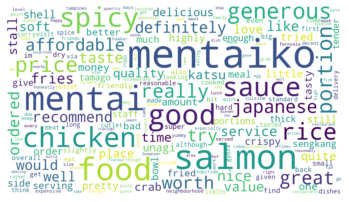

In [ ]:
### Create ```plot``` folder 
os.makedirs('plot', exist_ok=True)

mypath="."
### We're using one of the utility function! "read_word_count_file"
fullTermsDict = read_word_count_file(f'{mypath}/mentaiyareviews_unigram_counts.csv')
outputfile = f"{mypath}/Colab Notebooks/Unigram/wordcloud_count_unigram_mentaiya_reviews"
makeImage(fullTermsDict, outputfile)

In [ ]:
reviews_list=cleaned_df['clean_text_2'].tolist()

In [ ]:
reviews_list

['even despite asking less rice mentaiko amounts generous filled umami',
 'salmon slice thick delicious',
 'little bigger expected mentaiko fries didnâ\x80\x99t disappoint',
 'overall value money',
 'probably need work abit making rice w sauce tasty would perfect ð\x9f\x91\x8d',
 'absolutely loved food salmon mentaiko rice alongside fries great lunch portions particularly large considering affordable price would go',
 'hands best mentaiko place spicy salmon packs punch â\x80\x94 making shiok meal pair cold drink however fried chicken cutlet mentaiko stole show juicy crispy went well mentaiko without feeling greasy jelak would suggest getting mentaiko fries honestly couldnâ\x80\x99t get enough',
 'ordered salmon chicken mentaiya absolutely delicious chicken crispy salmon fresh portion generous yes rice nice soft come back eat someday although location bit way',
 'ordered spicy salmon mentai tad spicy taste good little plain good comes seaweed pickled ginger like serve japan isit much â\

# 5. Hugging Face Text Classification

In [ ]:
# this will take some time
!pip install datasets transformers[sentencepiece]

     |████████████████████████████████| 325 kB 4.2 MB/s 
     |████████████████████████████████| 3.8 MB 44.3 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 212 kB 51.9 MB/s 
     |████████████████████████████████| 134 kB 49.8 MB/s 
     |████████████████████████████████| 1.1 MB 42.8 MB/s 
     |████████████████████████████████| 127 kB 55.6 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 144 kB 45.7 MB/s 
     |████████████████████████████████| 271 kB 50.7 MB/s 
     |████████████████████████████████| 596 kB 42.1 MB/s 
     |████████████████████████████████| 895 kB 44.9 MB/s 
     |████████████████████████████████| 6.5 MB 37.8 MB/s 
     |████████████████████████████████| 1.2 MB 39.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
   

In [ ]:
## This will enable your coLab to use GPU!!! 
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [ ]:
from transformers import pipeline

*italicized text*## Pre-COVID-19

In [ ]:
# Load the "sentiment prediction" model.
classifier = pipeline("sentiment-analysis", device = 0)

# input: sentence, output: sentiment label and score
sentiment_list= classifier(reviews_list)
zipped_list=[]
for i in range(len(reviews_list)):
  zipped=[reviews_list[i],sentiment_list[i]['label'],sentiment_list[i]['score']]
  zipped_list.append(zipped)

df_sentiment=pd.DataFrame(zipped_list, columns=['review','sentiment','sentiment score'])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
df_sentiment

,review,sentiment,sentiment score
0,even despite asking less rice mentaiko amounts...,NEGATIVE,0.994158
1,salmon slice thick delicious,POSITIVE,0.999840
2,little bigger expected mentaiko fries didnât...,NEGATIVE,0.949056
3,overall value money,POSITIVE,0.997417
4,probably need work abit making rice w sauce ta...,NEGATIVE,0.993375
...,...,...,...
353,affordable japanese food west slice sashimi ra...,POSITIVE,0.993544
354,came back extremely good meal tenryu family fo...,POSITIVE,0.996614
355,salmon garlic fried rice ã¯â¿â½ ã¯â¿â½ overall...,POSITIVE,0.977917
356,nice foodcozy place reasonable price good service,POSITIVE,0.999620


In [ ]:
positive_review = df_sentiment.loc[df_sentiment['sentiment'] == 'POSITIVE']

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
positive_review

,review,sentiment,sentiment score
1,salmon slice thick delicious,POSITIVE,0.999840
3,overall value money,POSITIVE,0.997417
5,absolutely loved food salmon mentaiko rice alongside fries great lunch portions particularly large considering affordable price would go,POSITIVE,0.999306
6,hands best mentaiko place spicy salmon packs punch â making shiok meal pair cold drink however fried chicken cutlet mentaiko stole show juicy crispy went well mentaiko without feeling greasy jelak would suggest getting mentaiko fries honestly couldnât get enough,POSITIVE,0.962356
7,ordered salmon chicken mentaiya absolutely delicious chicken crispy salmon fresh portion generous yes rice nice soft come back eat someday although location bit way,POSITIVE,0.998068
11,spicy salmon mentai side gyoza price salmon tastes fresh strong overpowering spicy mentai sauce definitely great value,POSITIVE,0.999627
13,great place satisfy mentaiko cravings affordable mentaiko salmon spicy mentaiko fried chicken mentaiko mayo really good heat spicy mentaiko made better,POSITIVE,0.998154
14,gem neighbourhood salmon thick rice well cooked mentaiko sauce tasty little spiciness willtry softshell crab next visit,POSITIVE,0.991787
16,great value tasty food unagi tama mentaiko soft shell crab forgot take pic one im gonna get salmon next time im east,POSITIVE,0.989721
18,really amazing food decent prices newly opened estate favourite salmon mentai costs generous serving salmon mentaiko sauce drizzled love mentai fries tooplease donât find expensive hawker food find japanese food generous servings mentaiko sauce,POSITIVE,0.994875


In [ ]:
positive_review['sentiment score'].mean()

0.9721268395988308

In [ ]:
negative_review = df_sentiment.loc[df_sentiment['sentiment'] == 'NEGATIVE']
negative_review

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
negative_review

,review,sentiment,sentiment score
0,even despite asking less rice mentaiko amounts generous filled umami,NEGATIVE,0.994158
2,little bigger expected mentaiko fries didnât disappoint,NEGATIVE,0.949056
4,probably need work abit making rice w sauce tasty would perfect ð,NEGATIVE,0.993375
8,ordered spicy salmon mentai tad spicy taste good little plain good comes seaweed pickled ginger like serve japan isit much âcharâ taste although torched mentaiko mayo sauce top salmon thereâs teriyaki sauce drizzled white jasmine rice,NEGATIVE,0.756506
9,hard undercooked ricethe standard seem constant sometime alright sometime goodtoday nov standard quite bad bought chicken salmon mentai rice undercooked hardchicken tender dry seem quite smalllucky today salmon alright today someday drynot worth price,NEGATIVE,0.995880
10,ordered gyoza soft shell crab chicken salmon mentaiko donfor mentaiko salmon skin soggy portion size small side dishes eg shredded cabbage seasoned seaweed plain rice protein mentaiko sauce mentaiko sauce mainly mayo saltish side mentaiko burnt enough called aburi reason turn jelat end meal side dishes mitigate jelatnessnot worth price due quality portion sizefor gyoza slightly dryfor soft shell crab totally dry crab size smallboth side dishes worth tryingoverall overhyped place offers disappointing mealwilling try improvewill follow based others google review,NEGATIVE,0.998385
12,ordered mentaiko salmon mentaiko amount generous satisfied mentaiko cravings ðð gyoza nice crispy chicken cutlet thick itâs quite dry would recommend mentaiko salmon,NEGATIVE,0.982518
15,decided try mentaiya since nearby ordered mentai salmon dons taste great salty overcooked wonderful dinner hope business prospers unethical competitors wont last long need worry much good job keep good work,NEGATIVE,0.859264
17,came many times affordable pricing place new cleansalmon mentai eachtamago mentai yaki mentai fries,NEGATIVE,0.955938
21,decided try food pretty good value personally tried chicken katsu curry despite using chicken fillet tender one expect curry nice neither sweet spicy generous servings mentaiko sauce would suit fine believe though little much sons liking worth checking tried,NEGATIVE,0.983369


In [ ]:
negative_review['sentiment score'].mean()

0.9394508832323868

In [ ]:
df_sentiment['sentiment'].value_counts()

POSITIVE    245
NEGATIVE    113
Name: sentiment, dtype: int64

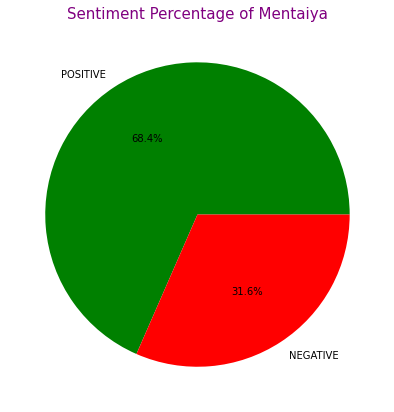

<Figure size 432x288 with 0 Axes>

In [ ]:
df = df_sentiment['sentiment'].value_counts()
#pie chart
df.dropna(inplace = True)
labels =df.index
colors = ['green','red']
explode = [0,0]
sizes = df.values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Sentiment Percentage of Mentaiya",color = 'purple',fontsize = 15)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig(f"./Colab Notebooks/Sentiment/Mentaiya_Sentiments.png")

In [ ]:
positive_review_list=positive_review['review'].tolist()
negative_review_list=negative_review['review'].tolist()

In [ ]:
df_positive_reviews = pd.DataFrame(positive_review_list)
df_positive_reviews 


,0
0,salmon slice thick delicious
1,overall value money
2,absolutely loved food salmon mentaiko rice alongside fries great lunch portions particularly large considering affordable price would go
3,hands best mentaiko place spicy salmon packs punch â making shiok meal pair cold drink however fried chicken cutlet mentaiko stole show juicy crispy went well mentaiko without feeling greasy jelak would suggest getting mentaiko fries honestly couldnât get enough
4,ordered salmon chicken mentaiya absolutely delicious chicken crispy salmon fresh portion generous yes rice nice soft come back eat someday although location bit way
5,spicy salmon mentai side gyoza price salmon tastes fresh strong overpowering spicy mentai sauce definitely great value
6,great place satisfy mentaiko cravings affordable mentaiko salmon spicy mentaiko fried chicken mentaiko mayo really good heat spicy mentaiko made better
7,gem neighbourhood salmon thick rice well cooked mentaiko sauce tasty little spiciness willtry softshell crab next visit
8,great value tasty food unagi tama mentaiko soft shell crab forgot take pic one im gonna get salmon next time im east
9,really amazing food decent prices newly opened estate favourite salmon mentai costs generous serving salmon mentaiko sauce drizzled love mentai fries tooplease donât find expensive hawker food find japanese food generous servings mentaiko sauce


In [ ]:
df_positive_reviews.to_csv(f"./Colab Notebooks/Sentiment/mentaiyareviews_postive_counts.csv", 'w', encoding="latin1")

In [ ]:
df_negative_reviews = pd.DataFrame(negative_review_list)
df_negative_reviews

,0
0,even despite asking less rice mentaiko amounts generous filled umami
1,little bigger expected mentaiko fries didnât disappoint
2,probably need work abit making rice w sauce tasty would perfect ð
3,ordered spicy salmon mentai tad spicy taste good little plain good comes seaweed pickled ginger like serve japan isit much âcharâ taste although torched mentaiko mayo sauce top salmon thereâs teriyaki sauce drizzled white jasmine rice
4,hard undercooked ricethe standard seem constant sometime alright sometime goodtoday nov standard quite bad bought chicken salmon mentai rice undercooked hardchicken tender dry seem quite smalllucky today salmon alright today someday drynot worth price
5,ordered gyoza soft shell crab chicken salmon mentaiko donfor mentaiko salmon skin soggy portion size small side dishes eg shredded cabbage seasoned seaweed plain rice protein mentaiko sauce mentaiko sauce mainly mayo saltish side mentaiko burnt enough called aburi reason turn jelat end meal side dishes mitigate jelatnessnot worth price due quality portion sizefor gyoza slightly dryfor soft shell crab totally dry crab size smallboth side dishes worth tryingoverall overhyped place offers disappointing mealwilling try improvewill follow based others google review
6,ordered mentaiko salmon mentaiko amount generous satisfied mentaiko cravings ðð gyoza nice crispy chicken cutlet thick itâs quite dry would recommend mentaiko salmon
7,decided try mentaiya since nearby ordered mentai salmon dons taste great salty overcooked wonderful dinner hope business prospers unethical competitors wont last long need worry much good job keep good work
8,came many times affordable pricing place new cleansalmon mentai eachtamago mentai yaki mentai fries
9,decided try food pretty good value personally tried chicken katsu curry despite using chicken fillet tender one expect curry nice neither sweet spicy generous servings mentaiko sauce would suit fine believe though little much sons liking worth checking tried


In [ ]:
df_negative_reviews.to_csv(f"./Colab Notebooks/Sentiment/mentaiyareviews_negative_counts.csv", 'w', encoding="latin1")

# 6. Topic Analysis BERTopic

## MENTAIYA TOPIC MODELLING

In [ ]:
!pip install distributed==2021.9.0

     |████████████████████████████████| 779 kB 4.2 MB/s 
     |████████████████████████████████| 1.0 MB 41.2 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.


In [ ]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.4 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 636 kB 47.4 MB/s 
     |████████████████████████████████| 79 kB 8.2 MB/s 
     |████████████████████████████████| 5.2 MB 30.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 34.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330864 sha256=bc513141d2587f49ff7dce60d3435f943a343549f63ccf070b7fb283999ad6de
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=018893a6a252207329760c3ca7595984ef023a81ba3e96bdffa1c7f1de804f82
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa914

In [ ]:
from bertopic import BERTopic
BERTopic

bertopic._bertopic.BERTopic

MENTAIYA POSITIVE!!!!!

In [ ]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(positive_review_list)

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

2022-03-26 09:11:37,356 - BERTopic - Transformed documents to Embeddings
2022-03-26 09:11:41,109 - BERTopic - Reduced dimensionality with UMAP
2022-03-26 09:11:41,140 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
freq = topic_model.get_topic_info(); freq.head(20)

,Topic,Count,Name
0,0,175,0_mentaiko_salmon_mentai_spicy
1,1,49,1_food_price_good_great
2,2,13,2_crab_shell_soft_mentaiko
3,-1,8,-1_tampines_katsu_food_keep


In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('mentaiko', 0.08843969542503971),
 ('salmon', 0.07415906325960393),
 ('mentai', 0.0663954345992369),
 ('spicy', 0.05494264539057628),
 ('sauce', 0.05066889990910926),
 ('chicken', 0.049111741434082624),
 ('good', 0.044075199064476406),
 ('food', 0.043811748942079905),
 ('generous', 0.040387299789781866),
 ('really', 0.03695324081523387)]

In [ ]:
topic_model.visualize_barchart(top_n_topics=4)

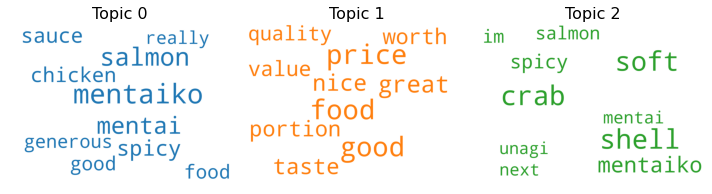

<Figure size 432x288 with 0 Axes>

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

tps = topic_model.get_topics()

fig, axes = plt.subplots(1, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(tps[i])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig(f"./Colab Notebooks/Topic/Mentaiya_Pos_Topics.png")

In [ ]:
#value of n_clusters doens't seem to affect the heatmap
topic_model.visualize_heatmap(n_clusters=3, width=1000, height=1000)

In [ ]:
# Visualize Topic Probabilities
topic_model.visualize_distribution(probs[1], min_probability=0.015)

In [ ]:
topic_model.get_topics()

{-1: [('tampines', 0.18402396125357928),
  ('katsu', 0.16063742630148567),
  ('food', 0.13101250188030739),
  ('keep', 0.11340525271725173),
  ('outlet', 0.11041437675214756),
  ('chicken', 0.10667893879749438),
  ('standard', 0.08397647694772384),
  ('always', 0.0806350480043863),
  ('say', 0.07790747040712327),
  ('support', 0.07790747040712327)],
 0: [('mentaiko', 0.08843969542503971),
  ('salmon', 0.07415906325960393),
  ('mentai', 0.0663954345992369),
  ('spicy', 0.05494264539057628),
  ('sauce', 0.05066889990910926),
  ('chicken', 0.049111741434082624),
  ('good', 0.044075199064476406),
  ('food', 0.043811748942079905),
  ('generous', 0.040387299789781866),
  ('really', 0.03695324081523387)],
 1: [('food', 0.12475892183828793),
  ('price', 0.12393298753769845),
  ('good', 0.12365431125899107),
  ('great', 0.09359769167456232),
  ('nice', 0.08576736525467579),
  ('taste', 0.08186523370081032),
  ('portion', 0.07855154947514444),
  ('worth', 0.0771906287292082),
  ('value', 0.07356

In [ ]:
topic_model.visualize_topics()

## FUKUDON NEGATIVE

In [ ]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(negative_review_list)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2022-03-26 09:12:01,244 - BERTopic - Transformed documents to Embeddings
2022-03-26 09:12:05,055 - BERTopic - Reduced dimensionality with UMAP
2022-03-26 09:12:05,074 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
freq = topic_model.get_topic_info(); freq.head(20)

,Topic,Count,Name
0,0,52,0_mentai_salmon_mentaiko_rice
1,-1,41,-1_chicken_good_food_worth
2,1,20,1_food_bad_price_would


In [ ]:
topic_model.get_topic(1)  # Select the most frequent topic

[('food', 0.19256578110084946),
 ('bad', 0.06942628231977795),
 ('price', 0.06489538547983509),
 ('would', 0.06489538547983509),
 ('portion', 0.06302468138011028),
 ('small', 0.06053720106922007),
 ('service', 0.05910296443904483),
 ('terrible', 0.056681886921237275),
 ('expensive', 0.056681886921237275),
 ('attitude', 0.05372024328507114)]

In [ ]:
topic_model.visualize_barchart(top_n_topics=3)

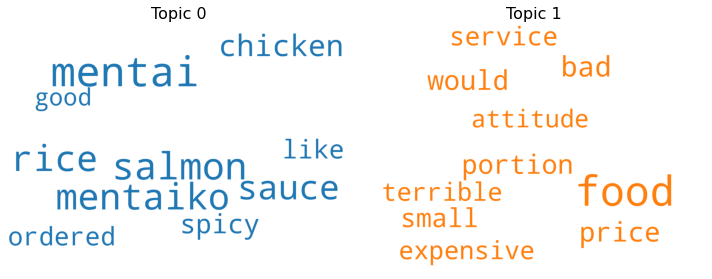

<Figure size 432x288 with 0 Axes>

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

tps = topic_model.get_topics()

fig, axes = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(tps[i])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig(f"./Colab Notebooks/Topic/Mentaiya_Neg_Topics.png")

In [ ]:
#value of n_clusters doens't seem to affect the heatmap
topic_model.visualize_heatmap(n_clusters=2, width=1000, height=1000)

In [ ]:
# Visualize Topic Probabilities
topic_model.visualize_distribution(probs[1], min_probability=0.015)

In [ ]:
topic_model.visualize_topics()

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1592: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: ignored